### Please write your name and student ID
- **Name**: Mahdi Amrollahi Biouki
- **Studet ID**: 401521048
- **Course**: IUST-Vision-2025

##### [Use Google Colab for easier access to the dataset]

# Part A) MNIST Dataset Classification
- In this notebook we will use Keras/Tensorflow to classify MNIST dataset using simple Fully Connected layers (called "dense layers" in Tensorflow)

# Imports

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras.utils import to_categorical, plot_model
from keras import  backend as K

# MNIST dataset

- MNIST is a dataset of handwritten digits (from 0 to 9).

- training set: 60,000 images, test set: 10,000 images

- To use the MNIST dataset in Keras, an API is provided to download.

### Loading MNIST

In [41]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

## Print the number of train and test data

In [42]:
print(len(x_train),(len(x_test)))

60000 10000


## Visualize some samples from the train data

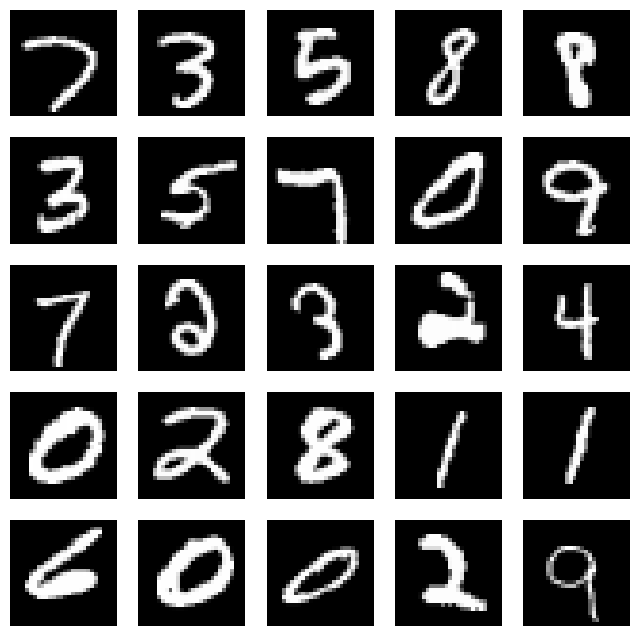

In [43]:
fig , axs = plt.subplots(5,5,figsize=(8,8))
for ax_i in axs:
  for ax in ax_i:
    a = np.random.randint(0,len(x_train)-1)
    ax.imshow(x_train[a],cmap='gray')
    ax.axis('off')
plt.show()

## Print number of classes

In [44]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


# Data Pre-processing

## One-Hot Encoding

- Now the labels are in digits format, 0 to 9.

- This is not suitable for the neural network. why? because prediction layer, outputs probabilities per class. and we cant compare it with true labels which are digits.

- A more suitable format is called a one-hot vector, a 10 element vector with all elements 0, except for the index of the digit class (for example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]).

In [45]:
# convert to one hot
y_train = to_categorical(y_train,num_labels)
y_test = to_categorical(y_test,num_labels)

## Data Preprocessing <a class="anchor" id="5.4"></a>


- In deep learning, data is stored in tensors (search and learn about it)

- Now we will compute the image dimensions (input_size of the first Fully Connected layer)

- Then we will scale each pixel value from 0 to 255 to range from 0.0 to 1.0 (normalization)
  raw pixel values can be used too, but it is better to normalize the input data as to avoid large gradient values that could make training difficult.

- The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying
  the output tensor by 255.  

- The proposed model is based on MLP layers. So the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 * 28] and [10000, 28 * 28], respectively.

## Print first layer size

In [46]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

## Resize and Normalize X_train and X_test

In [47]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

# Building the model

## Setting network parameters

- The **batch_size** indicates the number of data that we will use for each update of the model parameters.

- **Hidden_units** shows the number of hidden units (neurons in hidden layer).

In [48]:
batch_size = 32
hidden_units = 32

## Designing the model architecture

In [49]:
# create a 3 layer MLP with ReLU after each layer
model = Sequential()
model.add(Dense(hidden_units,input_shape=(input_size,)))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- A Dense layer is a linear operation, a sequence of linear operations is a linear operation and can only approximate a linear function.

- The problem is that the MNIST digit classification is a non-linear process. Adding a ReLu activation between Dense layers will enable MLPs to model non-linear mapping.

## View model summary

In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

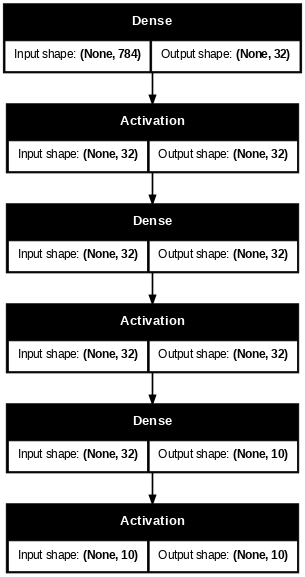

<Figure size 500x500 with 0 Axes>

In [51]:
plt.figure(figsize=(5, 5))
plot_model(model, to_file='mlp-mnist.png', show_shapes=True, dpi=60)

# Implement MLP model using Keras


- Steps:

  - Compiling the model with the compile() method.
  
  - Training the model with fit() method.
  
  - Evaluating the model performance with evaluate() method.

## Compile the model

In [52]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Loss function (categorical_crossentropy)

- In this example, we use **categorical_crossentropy** as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

- There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of the loss function is not arbitrary but should be a criterion that the model is learning.

- For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

### Optimization (optimizer Adam)

- With optimization, the objective is to minimize the loss function.

- The most commonly used optimizers are; **Stochastic Gradient Descent (SGD)**, **Adaptive Moments (Adam)** and **Root Mean Squared Propagation (RMSprop)**.

- Each optimizer features tunable parameters like learning rate, momentum, and decay.

- In the proposed classifier network, you should use Adam since it has the highest test accuracy.

### Metrics (Accuracy)

- Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss.

- During training, validation, and testing, other metrics such as **accuracy** can also be included.

- **Accuracy** is the percent of correct predictions based on ground truth.

## Train the model

In [53]:
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=20,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8163 - loss: 0.6072 - val_accuracy: 0.9407 - val_loss: 0.2030
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9434 - loss: 0.1890 - val_accuracy: 0.9529 - val_loss: 0.1503
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9580 - loss: 0.1416 - val_accuracy: 0.9598 - val_loss: 0.1333
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9653 - loss: 0.1152 - val_accuracy: 0.9658 - val_loss: 0.1167
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9708 - loss: 0.0992 - val_accuracy: 0.9612 - val_loss: 0.1254
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9748 - loss: 0.0844 - val_accuracy: 0.9652 - val_loss: 0.1128
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9751 - loss: 0.0759 - val_accuracy: 0.9685 - val_loss: 0.1084
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9791 - loss: 0.0672 - 

## Evaluating model performance

In [54]:
loss, acc = model.evaluate(x_test,y_test,batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9637 - loss: 0.1583

Test accuracy: 96.9%


## Plot Training & Validation history

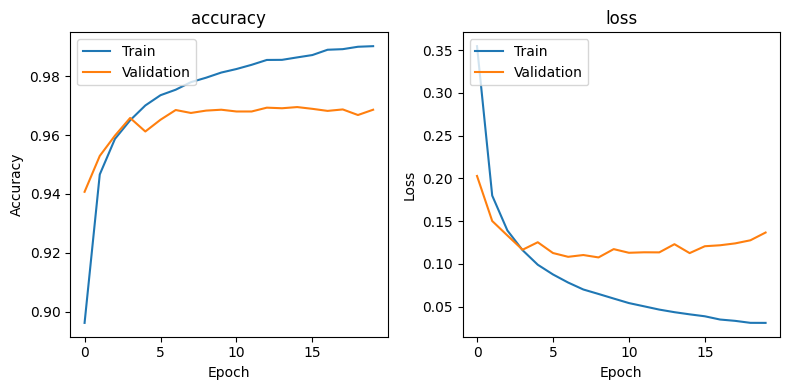

In [55]:
plt.figure(figsize=(8, 4))

# Plot training & validation accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
[[ 968    0    2    2    0    1    4    1    2    0]
 [   0 1120    4    2    0    1    2    2    4    0]
 [   4    1 1003    8    1    1    4    1    6    3]
 [   0    1    6  989    0    5    0    4    4    1]
 [   2    0    4    3  938    1   19    3    1   11]
 [   1    1    1   14    4  845   14    0   10    2]
 [   3    2    0    1    0    7  941    0    4    0]
 [   3    2   18    5    2    0    0  977    5   16]
 [   3    2    5    7    1    2    5    4  939    6]
 [   5    4    0   11   12    2    0    3    6  966]]


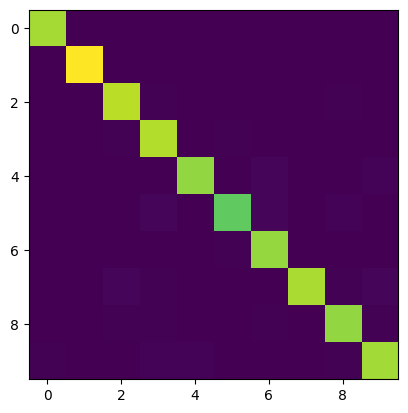

In [56]:
import sklearn.metrics
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)
conf = sklearn.metrics.confusion_matrix(y_true,y_pred,normalize=None)
print(conf)
plt.imshow(conf)

### Questions:

- Why Train accuracy and loss are getting much better than the validation? What is happenin?
- Why validation loss started increasing again after decreasing?
- What can we change in model architecture to solve this and get better validation results?
\

#### Write your answers here (not in the doc), Finglish is ok:


In [57]:
# 1 : be dalil inke model mlp pichide ast va baraye hamin overfit shode ast

# 2 : chon ke model az ye ja be bad faghat miad train ro be zoor yad migire va be gholi hefz mikone baraye hamin loss validation az ye ja be baad be jaye kam shodan ziad mishe chon model
# dige yad nemigire  va faghat dare hefz mikone

# 3 : age bekhahim az hamin model estefade bokonim yani mlp mitavanim ba estefade az ekseri ravesh ha mesl dropout anra behbood dahim to overfit nashe dropout yek tedadi az neuron haro
# khamoosh mikone  va intori baghie model yad migiran ya inke mishe dataset raham bishtar kard ya hata data haro yekam taqir dad va be model dad masalan shift image ha ya flip ke albate
# dar number classification flip khoob nist.

#Part B) Run the same model on the **CIFAR10 dataset** and explain why the results differ.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras.utils import to_categorical, plot_model
from keras import  backend as K

In [59]:
from keras.datasets import  cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()


In [60]:
print(len(x_train),len(x_test))

50000 10000


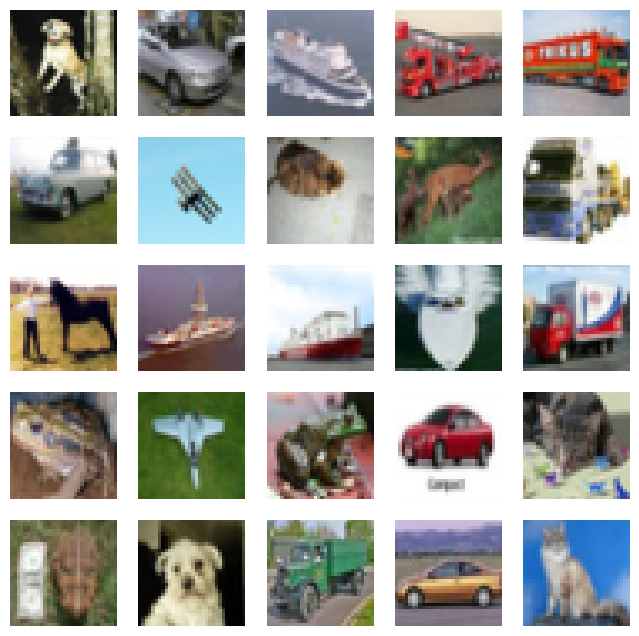

In [61]:
fig , axs = plt.subplots(5,5,figsize=(8,8))
for ax_i in axs:
  for ax in ax_i:
    a = np.random.randint(0,len(x_train)-1)
    ax.imshow(x_train[a])
    ax.axis('off')
plt.show()

In [62]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [63]:
y_train = to_categorical(y_train,num_labels)
y_test = to_categorical(y_test,num_labels)

In [64]:
image_size = x_train.shape[1]
input_size = image_size * image_size * 3 # for rgb
input_size

3072

In [65]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(50000,32*32*3)
x_test = x_test.reshape(10000,32*32*3)

In [66]:
batch_size = 32
hidden_units = 32

In [67]:
model = Sequential()
model.add(Dense(hidden_units,input_shape=(input_size,)))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │        98,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,722 (389.54 KB)

 Trainable params: 99,722 (389.54 KB)

 Non-trainable params: 0 (0.00 B)

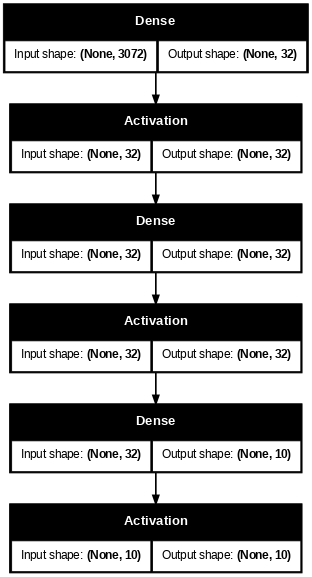

<Figure size 500x500 with 0 Axes>

In [69]:
plt.figure(figsize=(5,5))
plot_model(model,to_file='mlp-cifar10.png', show_shapes=True, dpi=60)

In [70]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [71]:
history = model.fit(x_train,y_train,batch_size,20,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2412 - loss: 2.0295 - val_accuracy: 0.3221 - val_loss: 1.8528
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3306 - loss: 1.8312 - val_accuracy: 0.3536 - val_loss: 1.7675
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3473 - loss: 1.7905 - val_accuracy: 0.3598 - val_loss: 1.7675
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3586 - loss: 1.7612 - val_accuracy: 0.3551 - val_loss: 1.7481
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3590 - loss: 1.7605 - val_accuracy: 0.3535 - val_loss: 1.8025
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3669 - loss: 1.7448 - val_accuracy: 0.3640 - val_loss: 1.7404
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3691 - loss: 1.7354 - val_accuracy: 0.3733 - val_loss: 1.7142
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3739 - loss: 1.7200 - 

In [72]:
loss, acc = model.evaluate(x_test,y_test,batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3978 - loss: 1.6574

Test accuracy: 39.3%


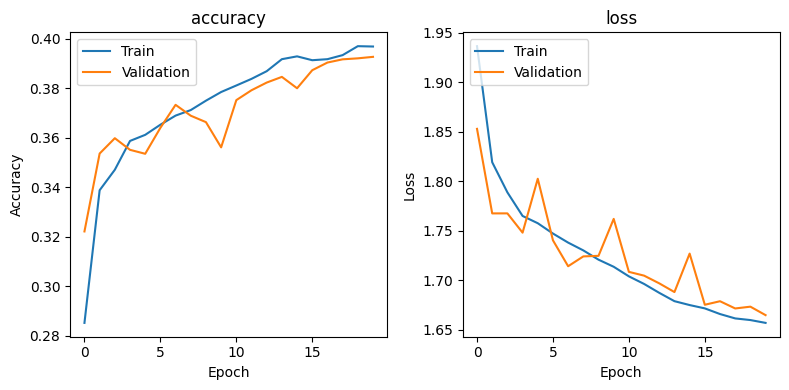

In [73]:
plt.figure(figsize=(8, 4))

# Plot training & validation accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[394  52 131  55  16   8  38  70 196  40]
 [ 27 514  19  28  18  14  52  44  90 194]
 [ 64  35 284  66 154  39 209 106  29  14]
 [ 18  35 104 205  63 138 297  78  24  38]
 [ 38  12 183  50 278  28 260 116  20  15]
 [ 20  22 103 154  93 265 203  86  37  17]
 [  4  21  96  83  83  38 619  34   4  18]
 [ 27  33  69  47 122  50  99 488  23  42]
 [138 164  51  42   3  39  22  25 456  60]
 [ 38 195  19  29  12  15  60  89 119 424]]


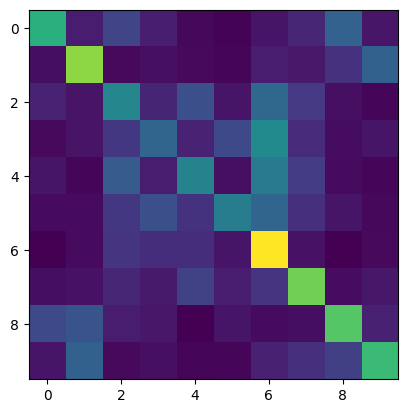

In [74]:
import sklearn.metrics
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)
conf = sklearn.metrics.confusion_matrix(y_true,y_pred,normalize=None)
print(conf)
plt.imshow(conf)